# Part B 

## Load Dataset

In [1]:
import pandas as pd

df = pd.read_csv("C:/Users/imand/Desktop/Achia/year3 sem1/TextAnalysis/test.csv/test.csv",header=None)
df.columns = ['Rating', 'Title', 'Review']
df.head(10)

,Rating,Title,Review
0,2,Great CD,My lovely Pat has one of the GREAT voices of h...
1,2,One of the best game music soundtracks - for a...,Despite the fact that I have only played a sma...
2,1,Batteries died within a year ...,I bought this charger in Jul 2003 and it worke...
3,2,"works fine, but Maha Energy is better",Check out Maha Energy's website. Their Powerex...
4,2,Great for the non-audiophile,Reviewed quite a bit of the combo players and ...
5,1,DVD Player crapped out after one year,I also began having the incorrect disc problem...
6,1,Incorrect Disc,"I love the style of this, but after a couple y..."
7,1,DVD menu select problems,I cannot scroll through a DVD menu that is set...
8,2,Unique Weird Orientalia from the 1930's,"Exotic tales of the Orient from the 1930's. ""D..."
9,1,"Not an ""ultimate guide""","Firstly,I enjoyed the format and tone of the b..."


In [2]:
df.shape

(400000, 3)

## Check Missing Value

In [3]:
df.isnull().sum()

Rating     0
Title     24
Review     0
dtype: int64

In [4]:
#Remove Missing Value
df = df.dropna()
df.shape


(399976, 3)

In [5]:
df.isnull().sum()

Rating    0
Title     0
Review    0
dtype: int64

In [6]:
df.duplicated().sum()


np.int64(0)

## Set labels to 0 and 1

In [7]:
def decrease_label_by_one(label):
    return label - 1

df['Rating'] = df['Rating'].apply(decrease_label_by_one)

## Count ratings

In [8]:
df.Rating.value_counts(normalize = True)


Rating
1    0.50001
0    0.49999
Name: proportion, dtype: float64

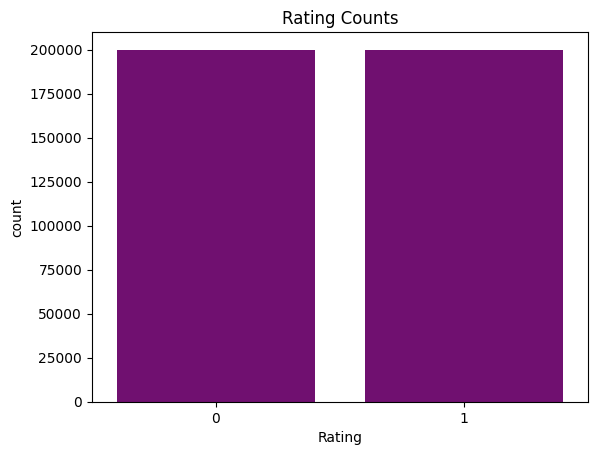

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

color_palette = ['purple', 'cyan']
sns.set_palette(color_palette) 
sns.countplot(x=df['Rating'])

plt.title('Rating Counts')
plt.show()

## Text Preprocessing

In [10]:
import re
import contractions
import nltk
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


def preprocess_text(text):
    # Text clean
    text = re.sub(r'[\W_]+', ' ', contractions.fix(re.sub(r'\d+', '', text.replace(' s ', ' ')))).lower()

    # Stopword removal
    tokens = nltk.word_tokenize(text)
    text = " ".join([token for token in tokens if token not in stop_words])

    # Data Normalization
    normalized_text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(normalized_text)

    return text

In [11]:
from termcolor import colored
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
from nltk.tokenize import word_tokenize
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
stemmer = SnowballStemmer("english")


print(colored('Before of clean (Title):\n', 'blue'), df.Title[8])
print(colored('After of clean (Title):\n', 'blue'), preprocess_text(df.Title[8]))
print(colored('Before of clean (Review):\n', 'blue'), df.Review[8])
print(colored('After of clean (Review):\n', 'blue'), preprocess_text(df.Review[8]))

Before of clean (Title):
 Unique Weird Orientalia from the 1930's
After of clean (Title):
 uniqu weird orientalia
Before of clean (Review):
 Exotic tales of the Orient from the 1930's. "Dr Shen Fu", a Weird Tales magazine reprint, is about the elixir of life that grants immortality at a price. If you're tired of modern authors who all sound alike, this is the antidote for you. Owen's palette is loaded with splashes of Chinese and Japanese colours. Marvelous.
After of clean (Review):
 exot tale orient dr shen fu weird tale magazin reprint elixir life grant immort price tire modern author sound alik antidot owen palett load splash chines japanes colour marvel


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\imand\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Cleaning and processing on the Review variable


In [12]:
import swifter

df['Title'] = df['Title'].swifter.apply(preprocess_text)
df['Review'] = df['Review'].swifter.apply(preprocess_text)
df.head(10)

C:\Users\imand\AppData\Roaming\Python\Python312\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Pandas Apply: 100%|██████████| 399976/399976 [04:13<00:00, 1575.47it/s]


,Rating,Title,Review
0,1,great cd,love pat one great voic generat listen cd year...
1,1,one best game music soundtrack game realli play,despit fact play small portion game music hear...
2,0,batteri die within year,bought charger jul work ok design nice conveni...
3,1,work fine maha energi better,check maha energi websit powerex mh cf charger...
4,1,great non audiophil,review quit bit combo player hesit due unfavor...
5,0,dvd player crap one year,also began incorrect disc problem read vcr sti...
6,0,incorrect disc,love style coupl year dvd give problem even wo...
7,0,dvd menu select problem,scroll dvd menu set vertic triangl key select ...
8,1,uniqu weird orientalia,exot tale orient dr shen fu weird tale magazin...
9,0,ultim guid,first enjoy format tone book author address re...


## Save File into new csv

In [13]:
df.to_csv("clean_test.csv", index=False)


## Frequency Words

In [15]:
from collections import Counter

words = Counter(' '.join(df['Review'].to_list()).split())
Frequency_words_Review = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Review = Frequency_words_Review.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Review['Rank'] = Frequency_words_Review['Rank'].apply(lambda x : x+1)
Frequency_words_Review.head(20)

,Rank,Words,Frequency
0,1,book,229759
1,2,one,151701
2,3,like,124502
3,4,would,112962
4,5,read,99352
5,6,use,96679
6,7,get,94677
7,8,good,94163
8,9,great,90726
9,10,time,90159


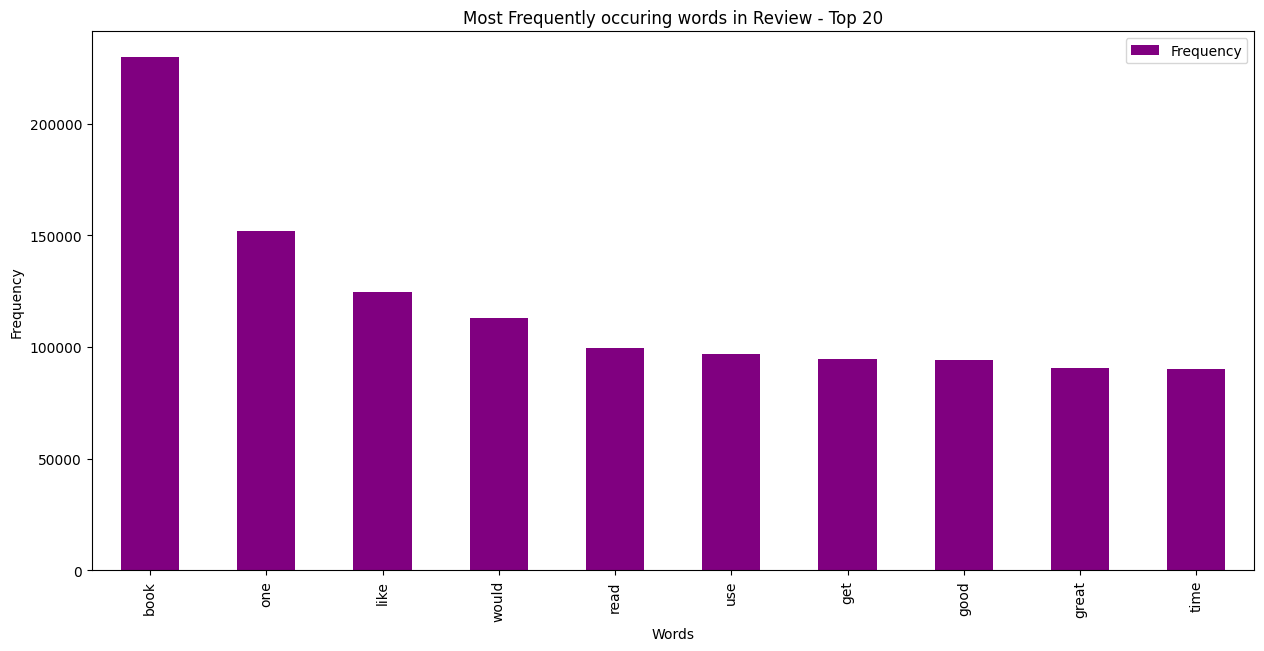

In [16]:
Top10 = Frequency_words_Review[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'purple')
plt.title("Most Frequently occuring words in Review - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

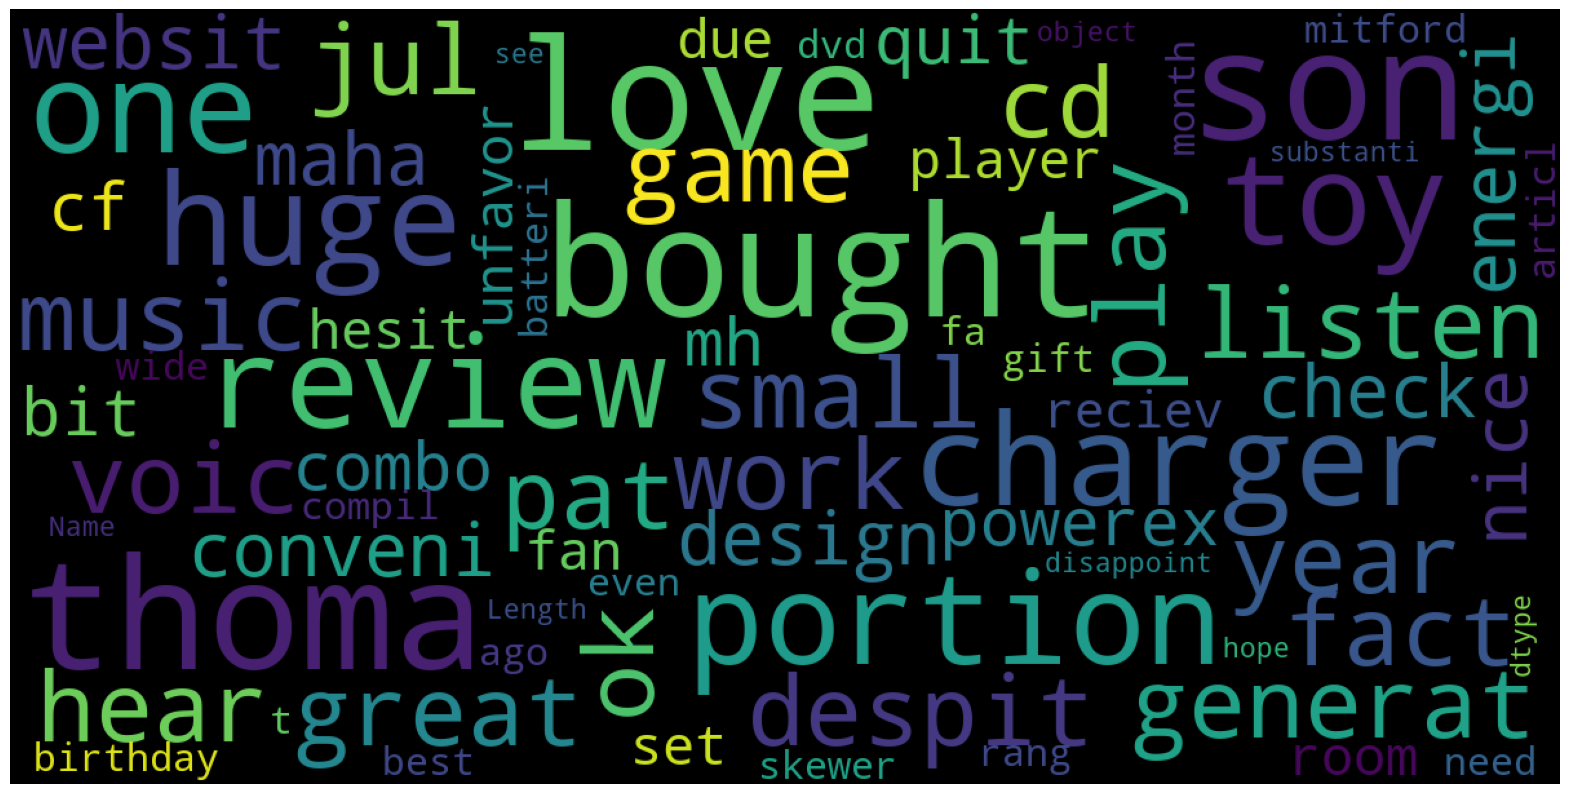

In [17]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Review"])

In [18]:
from collections import Counter

words = Counter(' '.join(df['Title'].to_list()).split())
Frequency_words_Title = pd.DataFrame([words]).transpose().reset_index().rename(columns = {'index': 'Words', 0:'Frequency' })
Frequency_words_Title = Frequency_words_Title.sort_values('Frequency',ascending=False).reset_index(drop='index').reset_index().rename(columns={'index':'Rank'})
Frequency_words_Title['Rank'] = Frequency_words_Title['Rank'].apply(lambda x : x+1)
Frequency_words_Title.head(20)

,Rank,Words,Frequency
0,1,great,30919
1,2,good,22100
2,3,book,20270
3,4,best,10697
4,5,work,10304
5,6,love,8750
6,7,read,8444
7,8,one,8288
8,9,disappoint,8279
9,10,movi,7657


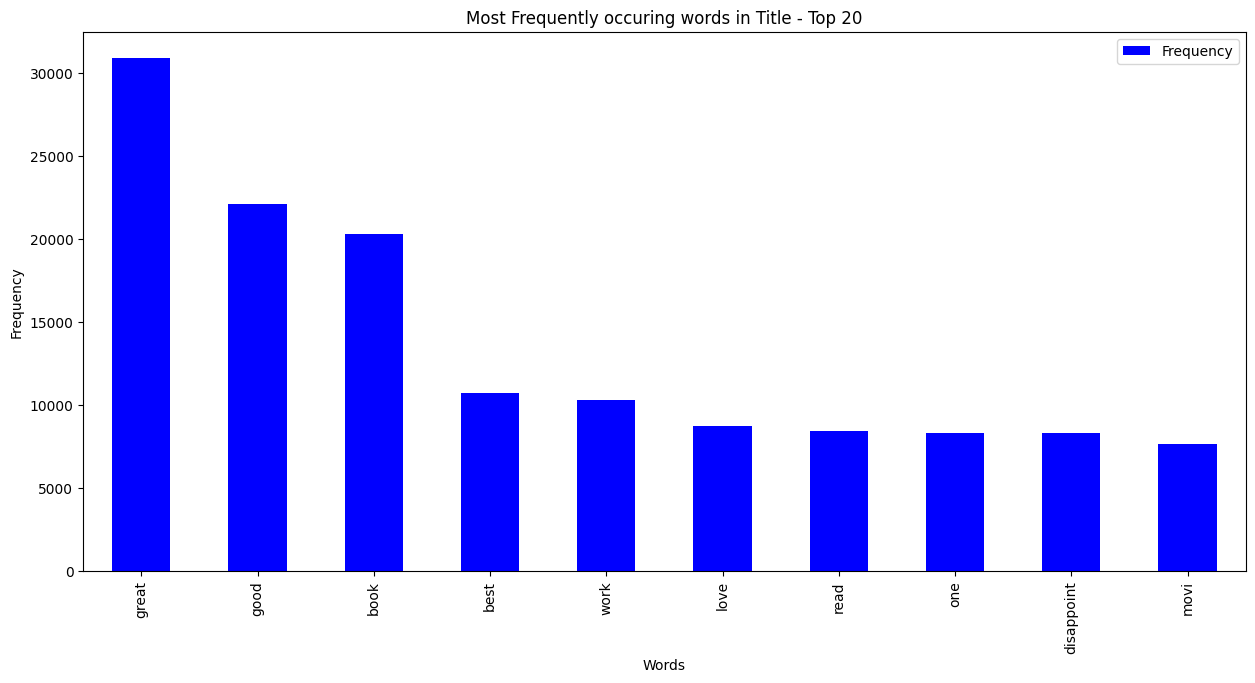

In [19]:
Top10 = Frequency_words_Title[['Words','Frequency']].head(10)
Top10.plot(x="Words", y="Frequency", kind='bar',  figsize=(15,7), color = 'blue')
plt.title("Most Frequently occuring words in Title - Top 20")
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

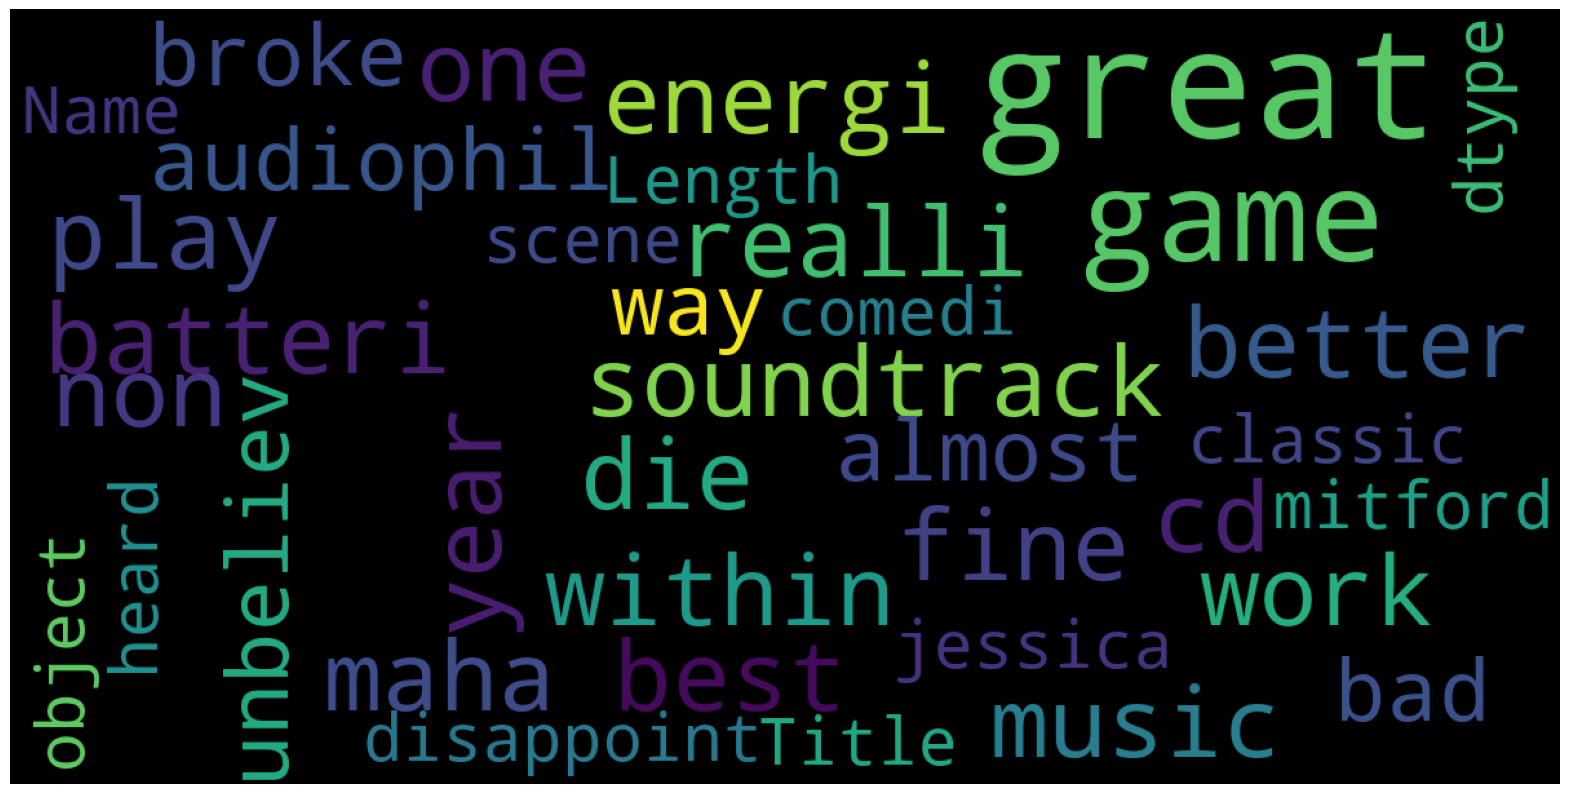

In [20]:
from wordcloud import WordCloud
#  WordCloud chart 

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'black',
        max_words = 350,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()

# print wordcloud
show_wordcloud(df["Title"])